<a href="https://colab.research.google.com/github/Tahir-MD/CodeAlpha_ML_Intership/blob/main/CodeAlpha_Intership_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('credit_risk_dataset.csv')
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (32581, 12)

First 5 rows:
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59               

In [2]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [3]:
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
print("Missing values handled")
print(df.isnull().sum())

Missing values handled
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


/tmp/ipython-input-2020463642.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)
/tmp/ipython-input-2020463642.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [4]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
    print(f"Encoded: {col}")

Encoded: person_home_ownership
Encoded: loan_intent
Encoded: loan_grade
Encoded: cb_person_default_on_file


In [5]:
df['debt_to_income'] = df['loan_amnt'] / df['person_income']
df['payment_to_income'] = df['loan_amnt'] * df['loan_int_rate'] / (12 * 100 * df['person_income'])
print("New features created")
print(df[['debt_to_income', 'payment_to_income']].head())

New features created
   debt_to_income  payment_to_income
0        0.593220           0.007919
1        0.104167           0.000967
2        0.572917           0.006145
3        0.534351           0.006782
4        0.643382           0.007651


In [6]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (32581, 13)
Target shape: (32581,)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train set:", X_train.shape)
print("Test set:", X_test.shape)

Train set: (26064, 13)
Test set: (6517, 13)


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Features scaled successfully")

Features scaled successfully


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression Results:
Accuracy: 0.8605186435476446

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.91      5095
           1       0.77      0.52      0.62      1422

    accuracy                           0.86      6517
   macro avg       0.82      0.74      0.77      6517
weighted avg       0.85      0.86      0.85      6517


Confusion Matrix:
[[4868  227]
 [ 682  740]]


In [10]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Results:
Accuracy: 0.8902869418444069

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      5095
           1       0.74      0.77      0.75      1422

    accuracy                           0.89      6517
   macro avg       0.84      0.85      0.84      6517
weighted avg       0.89      0.89      0.89      6517



In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
Accuracy: 0.9298757096823692

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5095
           1       0.96      0.71      0.81      1422

    accuracy                           0.93      6517
   macro avg       0.94      0.85      0.89      6517
weighted avg       0.93      0.93      0.93      6517



In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
predictions = [y_pred_lr, y_pred_dt, y_pred_rf]

results = []
for name, y_pred in zip(models, predictions):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append([name, acc, prec, rec, f1])

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
print(results_df)

                 Model  Accuracy  Precision    Recall        F1
0  Logistic Regression  0.860519   0.765253  0.520394  0.619506
1        Decision Tree  0.890287   0.736455  0.774262  0.754885
2        Random Forest  0.929876   0.962608  0.706048  0.814604


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

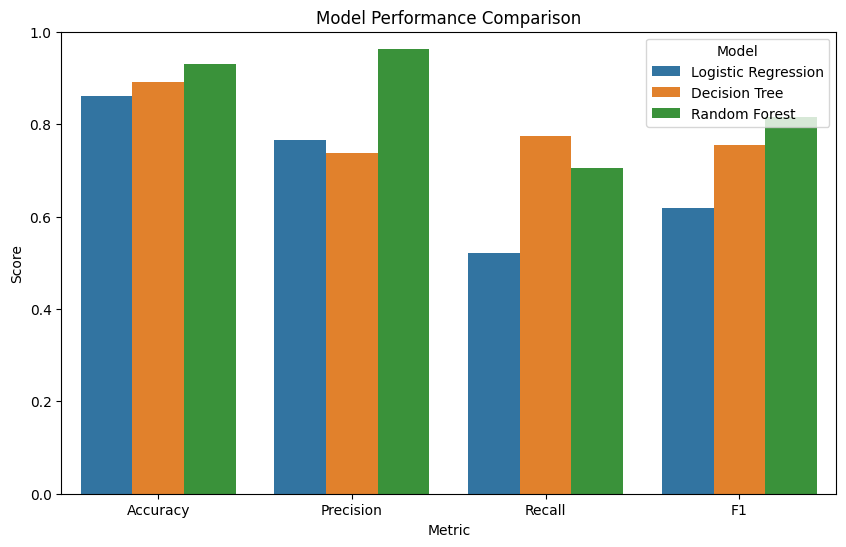

In [14]:
plt.figure(figsize=(10,6))
results_melted = results_df.melt(id_vars=['Model'], var_name='Metric', value_name='Score')
sns.barplot(x='Metric', y='Score', hue='Model', data=results_melted)
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.show()

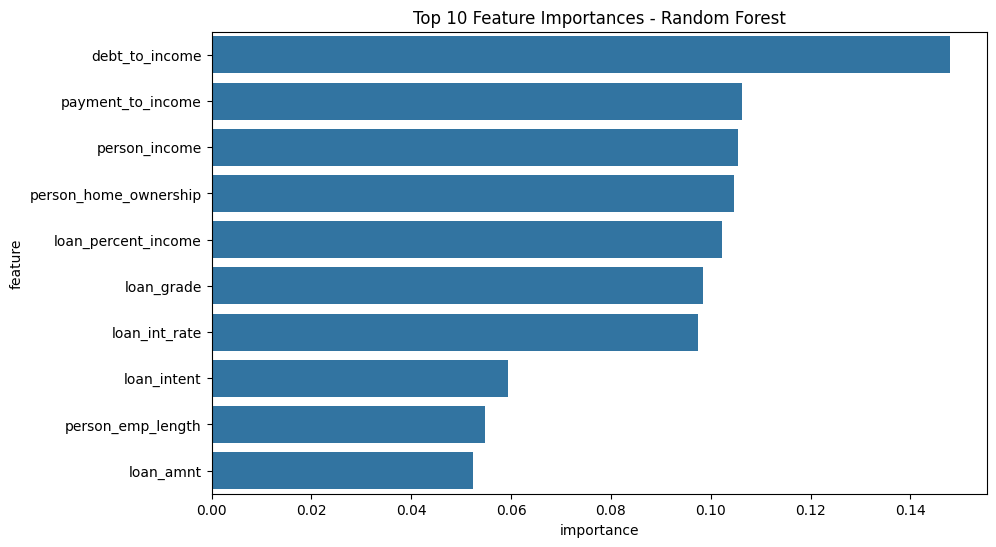

In [15]:
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances - Random Forest')
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_depth': 20, 'n_estimators': 200}
Best score: 0.9270814184042703


In [17]:
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test_scaled)

print("Tuned Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

Tuned Random Forest Results:
Accuracy: 0.9280343716433942

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5095
           1       0.96      0.70      0.81      1422

    accuracy                           0.93      6517
   macro avg       0.94      0.85      0.88      6517
weighted avg       0.93      0.93      0.92      6517



In [18]:
import joblib

joblib.dump(best_rf, 'credit_scoring_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model saved successfully!")

Model saved successfully!


In [19]:
sample_data = X_test_scaled[0].reshape(1, -1)
prediction = best_rf.predict(sample_data)
probability = best_rf.predict_proba(sample_data)

print("Sample Prediction:")
print("Class:", "Default" if prediction[0] == 1 else "Good Credit")
print("Probability:", probability)

Sample Prediction:
Class: Good Credit
Probability: [[0.93846901 0.06153099]]
